### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#Importing dataset
path=r'C:\Users\User01\Analysing India Air Quality Data'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'city_final.pkl'))

In [4]:
df.head()

,State,City,Year,Month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI,Level_of_Concern
0,Andhra Pradesh,Amaravati,2017,11,194.958571,43.172857,0.120000,11.531429,118.801429,18.595714,6.177143,157.857143,Hazardous
1,Andhra Pradesh,Amaravati,2017,12,229.464516,70.963548,0.151935,17.501290,77.179355,14.312903,4.726774,194.129032,Hazardous
2,Andhra Pradesh,Amaravati,2018,1,215.278387,73.489032,0.069355,21.212903,68.874194,14.839355,6.280645,172.451613,Hazardous
3,Andhra Pradesh,Amaravati,2018,2,155.282143,45.791786,0.575000,17.724643,28.923571,11.025714,3.023929,107.035714,Hazardous
4,Andhra Pradesh,Amaravati,2018,3,117.172581,35.543226,0.706774,13.217097,22.076452,10.769355,2.160000,77.516129,Hazardous


### 2. Data cleaning

In [5]:
df.columns

Index(['State', 'City', 'Year', 'Month', 'PM', 'Nitric', 'CO', 'NH3', 'O3',
       'SO2', 'BTX', 'AQI', 'Level_of_Concern'],
      dtype='object')

In [6]:
df.shape

(1001, 13)

In [7]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

State               0
City                0
Year                0
Month               0
PM                  0
Nitric              0
CO                  0
NH3                 0
O3                  0
SO2                 0
BTX                 0
AQI                 0
Level_of_Concern    0
dtype: int64

In [8]:
# check for duplicate values

dups = df.duplicated()

In [9]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
1000    False
1001    False
1002    False
1003    False
1004    False
Length: 1001, dtype: bool

In [10]:
#No duplicated found

##### Extreme values checks

C:\Users\User01\AppData\Local\Temp\ipykernel_13296\4282633757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AQI'], bins=25) # Shows extreme values


<Axes: xlabel='AQI', ylabel='Density'>

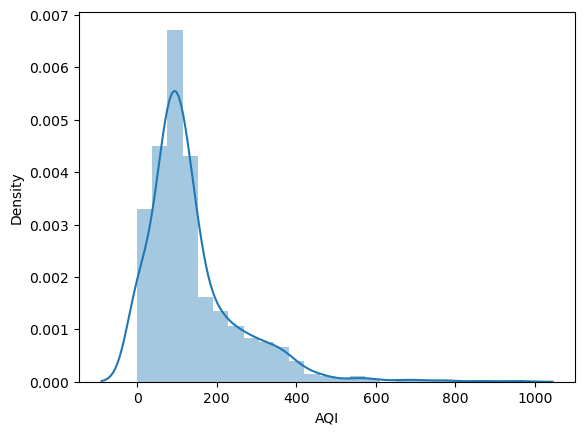

In [11]:
sns.distplot(df['AQI'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['AQI'].mean() # Check the mean

137.05282746473196

In [13]:
df['AQI'].median() # Check the median

106.0

In [14]:
df['AQI'].max() # Check the max

955.3666666666668

### 3. Data prep for regression analysis 

### Test Hypothesis: "If concentration of PM is higher in the air, then air will be more polluted resulting into higher AQI."

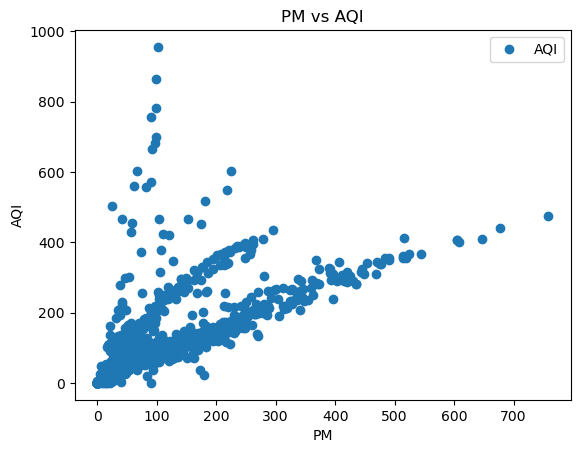

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'PM', y='AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('PM vs AQI')  
plt.xlabel('PM')  
plt.ylabel('AQI')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['PM'].values.reshape(-1,1)
y = df['AQI'].values.reshape(-1,1)

In [17]:
X

array([[194.95857143],
       [229.46451613],
       [215.2783871 ],
       ...,
       [ 54.01451613],
       [ 48.40366667],
       [ 42.11      ]])

In [18]:
y

array([[157.85714286],
       [194.12903226],
       [172.4516129 ],
       ...,
       [ 53.16129032],
       [ 46.46666667],
       [ 45.        ]])

In [19]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [20]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

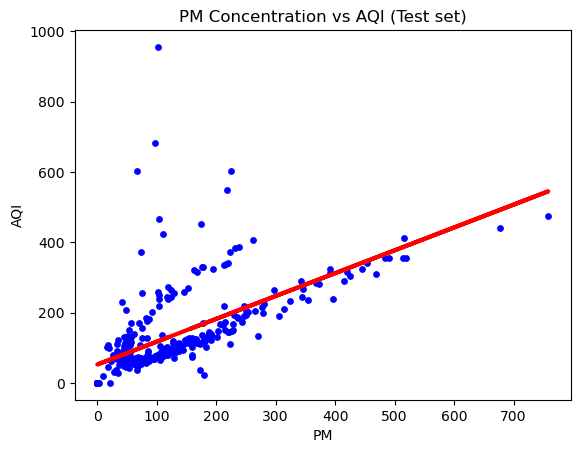

In [23]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('PM Concentration vs AQI (Test set)')
plot_test.xlabel('PM')
plot_test.ylabel('AQI')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.64940439]]
Mean squared error:  9767.378822332917
R2 score:  0.35785753727650704


# The linear regression model is fit to the data as we have a positive slope but with a relatively low R2 score, indicating that it explains only 35.8% of the variability in the target variable.

In [26]:
y_predicted

array([[129.47242422],
       [104.99595379],
       [389.95651347],
       [ 95.87873512],
       [ 75.39974673],
       [ 83.37226796],
       [114.65118124],
       [186.57020193],
       [171.00246343],
       [232.54945027],
       [ 70.37140854],
       [ 83.80931711],
       [135.04710703],
       [120.74505767],
       [ 89.41871762],
       [157.77171485],
       [ 52.37576348],
       [147.02555761],
       [212.41162962],
       [127.18541748],
       [ 81.20195849],
       [196.15619979],
       [118.40850068],
       [101.02872142],
       [206.72987888],
       [138.28442282],
       [167.80173772],
       [141.57962639],
       [197.74577415],
       [201.39102763],
       [156.11075489],
       [168.94125389],
       [ 52.37576348],
       [204.88467362],
       [ 73.38776624],
       [282.34431251],
       [210.39659064],
       [151.93280825],
       [158.41879781],
       [324.72276014],
       [174.01088163],
       [ 98.59257512],
       [145.25914568],
       [ 74

In [27]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,80.064516,129.472424
1,73.161290,104.995954
2,356.100000,389.956513
3,601.741935,95.878735
4,120.733333,75.399747
5,59.366667,83.372268
6,67.103448,114.651181
7,168.466667,186.570202
8,101.000000,171.002463
9,216.935484,232.549450


##### It is evident that the model is not a great fit as we can see there is quite a difference between actual and predicted values.

#### Compare how the regression fits the training set

In [28]:
# PredictX_train
y_predicted_train = regression.predict(X_train) 

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.64940439]]
Mean squared error:  8583.632953446062
R2 score:  0.3561036172105695


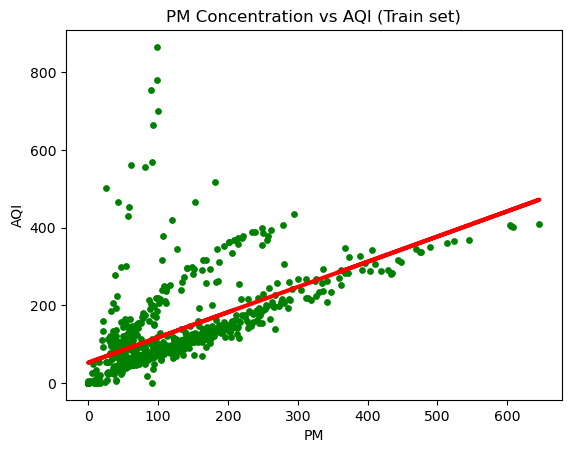

In [31]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('PM Concentration vs AQI (Train set)')
plot_test.xlabel('PM')
plot_test.ylabel('AQI')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [32]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.
df_test = df[df['PM'] <=400] 

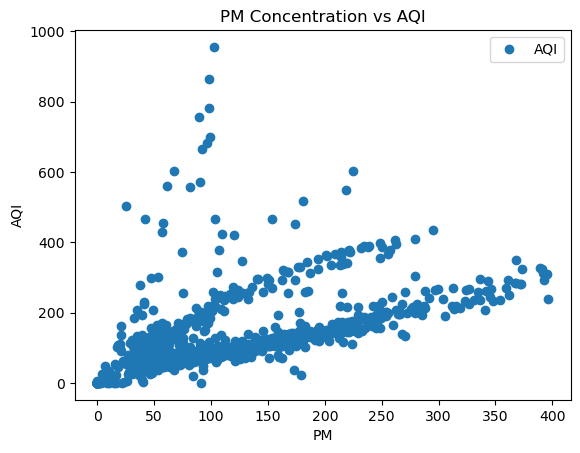

In [33]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'PM', y='AQI', style='o')  
plot_test.title('PM Concentration vs AQI')
plot_test.xlabel('PM')
plot_test.ylabel('AQI')
plot_test.show()

In [34]:
# Reshape again.
X_2 = df_test['PM'].values.reshape(-1,1)
y_2 = df_test['AQI'].values.reshape(-1,1)

In [35]:
# Split data into a training set and a test set.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [36]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [37]:
# Predict y value from X.
y_predicted_2 = regression.predict(X_test_2)

In [38]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.71143675]]
Mean squared error:  9167.22925029682
R2 score:  0.29828900359688304


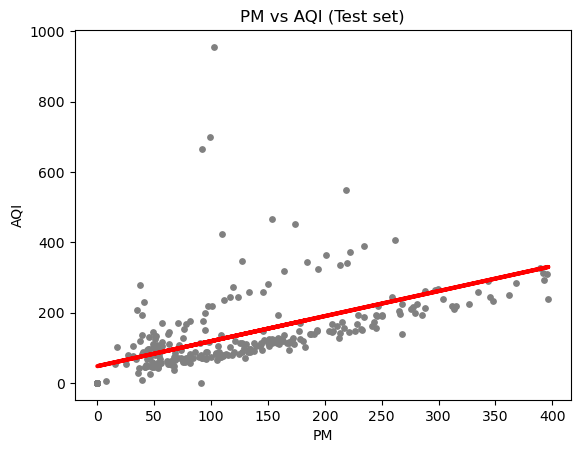

In [40]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('PM vs AQI (Test set)')
plot_test.xlabel('PM')
plot_test.ylabel('AQI')
plot_test.show()

In [41]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,54.064516,92.351706
1,251.000000,305.215647
2,218.612903,222.978149
3,126.965517,198.667611
4,465.032258,156.636901
5,219.400000,269.233984
6,143.580645,82.491881
7,148.645161,185.041587
8,188.903226,226.012541
9,145.580645,205.169969


# This certainly does not fit the model at all, this could be a distortion of reality (as we don’t know for a fact that the extreme values were indeed outliers)

In [42]:
# Exporting final data set as pkl. format
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'city_final_V2.pkl'))